In [ ]:
%pip install setuptools

In [ ]:
import sys
print(sys.executable)  # Check which Python executable is being used
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import layers, models

In [70]:
data_dir = "./animals/"

batch_size = 32
img_height = 180
img_width = 180

In [71]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2934 files belonging to 4 classes.
Using 2348 files for training.


In [72]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2934 files belonging to 4 classes.
Using 586 files for validation.


In [73]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

In [74]:
num_classes = 11

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

In [75]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [76]:
epochs = 5
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/5
74/74 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.5189 - loss: 1.5463 - val_accuracy: 0.8993 - val_loss: 0.2927
Epoch 2/5
74/74 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.8744 - loss: 0.3543 - val_accuracy: 0.8993 - val_loss: 0.2658
Epoch 3/5
74/74 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.9050 - loss: 0.2746 - val_accuracy: 0.9096 - val_loss: 0.2600
Epoch 4/5
74/74 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.9186 - loss: 0.2463 - val_accuracy: 0.8976 - val_loss: 0.2705
Epoch 5/5
74/74 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.9035 - loss: 0.2710 - val_accuracy: 0.9181 - val_loss: 0.2437


In [ ]:
%pip install matplotlib

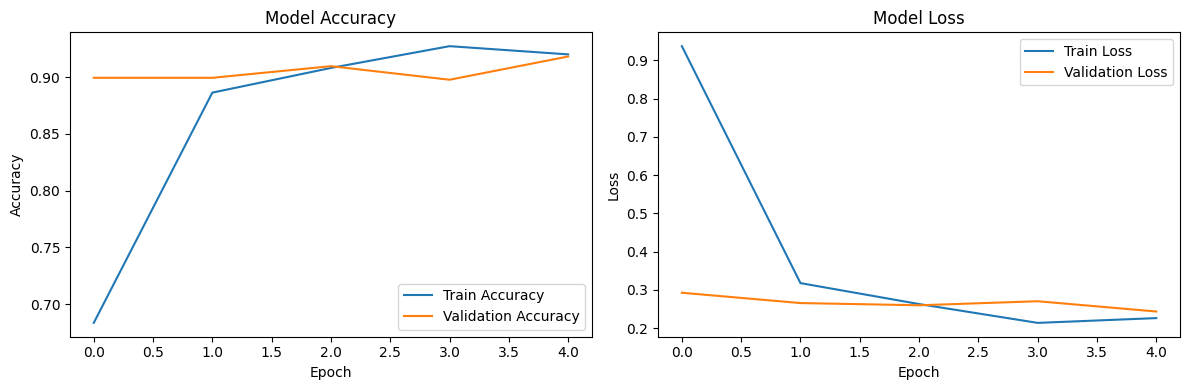

In [77]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [78]:
val_loss, val_acc = model.evaluate(val_ds)
print(f'Validation accuracy: {val_acc}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 219ms/step - accuracy: 0.9088 - loss: 0.2732
Validation accuracy: 0.9180887341499329


In [79]:
model.save('animal_classifier_modelv2.keras')